In [1]:
import sys
from pathlib import Path

def is_google_colab() -> bool:
    if "google.colab" in str(get_ipython()):
        return True
    return False

def clone_repository() -> None:
    !git clone https://github.com/decodingml/hands-on-recommender-system.git
    %cd hands-on-recommender-system/

def install_dependencies() -> None:
    !pip install --upgrade uv
    !uv pip install --all-extras --system --requirement pyproject.toml

if is_google_colab():
    clone_repository()
    install_dependencies()
    root_dir = str(Path().absolute())
    print("⛳️ Google Colab environment")
else:
    root_dir = str(Path().absolute().parent)
    print("⛳️ Local environment")

# Add the root directory to the PYTHONPATH
if root_dir not in sys.path:
    print(f"Adding the following directory to the PYTHONPATH: {root_dir}")
    sys.path.append(root_dir)

⛳️ Local environment
Adding the following directory to the PYTHONPATH: c:\Users\haileyesus\Desktop\DEV\Real-Time-Personalized-Recommender


In [2]:
# Importing the required libraries 
import numpy as np 
import seaborn as sns
import polars as pl 
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

c:\Users\haileyesus\Desktop\DEV\Real-Time-Personalized-Recommender\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Extract the dataset
from recosystem.raw_data import hm as hm_raw_data

article_df = hm_raw_data.extract_art_df()
article_df.head()

article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
i64,i64,str,i64,str,str,i64,str,i64,str,i64,str,i64,str,i64,str,str,str,i64,str,i64,str,i64,str,str
108775015,108775,"""Strap top""",253,"""Vest top""","""Garment Upper body""",1010016,"""Solid""",9,"""Black""",4,"""Dark""",5,"""Black""",1676,"""Jersey Basic""","""A""","""Ladieswear""",1,"""Ladieswear""",16,"""Womens Everyday Basics""",1002,"""Jersey Basic""","""Jersey top with narrow shoulde…"
108775044,108775,"""Strap top""",253,"""Vest top""","""Garment Upper body""",1010016,"""Solid""",10,"""White""",3,"""Light""",9,"""White""",1676,"""Jersey Basic""","""A""","""Ladieswear""",1,"""Ladieswear""",16,"""Womens Everyday Basics""",1002,"""Jersey Basic""","""Jersey top with narrow shoulde…"
108775051,108775,"""Strap top (1)""",253,"""Vest top""","""Garment Upper body""",1010017,"""Stripe""",11,"""Off White""",1,"""Dusty Light""",9,"""White""",1676,"""Jersey Basic""","""A""","""Ladieswear""",1,"""Ladieswear""",16,"""Womens Everyday Basics""",1002,"""Jersey Basic""","""Jersey top with narrow shoulde…"
110065001,110065,"""OP T-shirt (Idro)""",306,"""Bra""","""Underwear""",1010016,"""Solid""",9,"""Black""",4,"""Dark""",5,"""Black""",1339,"""Clean Lingerie""","""B""","""Lingeries/Tights""",1,"""Ladieswear""",61,"""Womens Lingerie""",1017,"""Under-, Nightwear""","""Microfibre T-shirt bra with un…"
110065002,110065,"""OP T-shirt (Idro)""",306,"""Bra""","""Underwear""",1010016,"""Solid""",10,"""White""",3,"""Light""",9,"""White""",1339,"""Clean Lingerie""","""B""","""Lingeries/Tights""",1,"""Ladieswear""",61,"""Womens Lingerie""",1017,"""Under-, Nightwear""","""Microfibre T-shirt bra with un…"


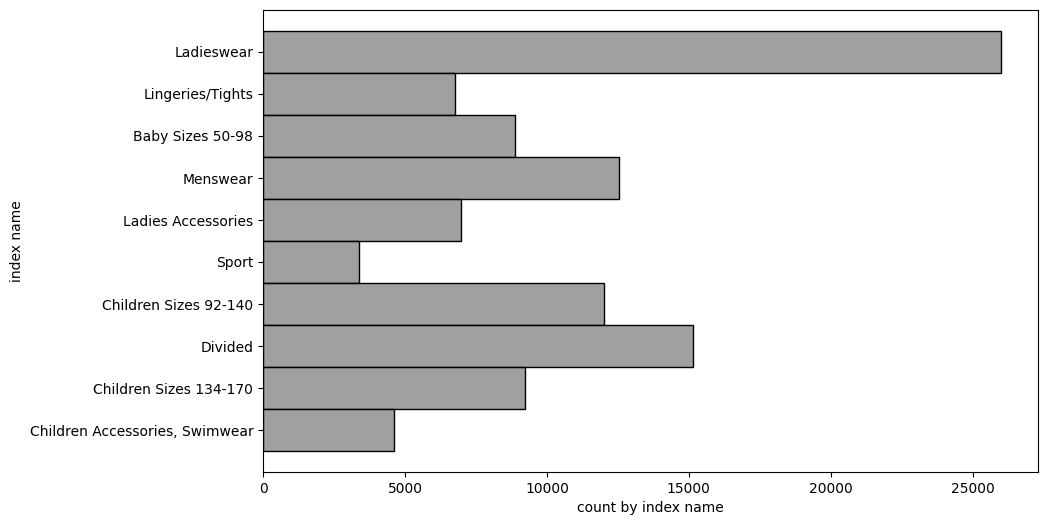

In [4]:
# Plot the count by index name

f, ax = plt.subplots(figsize=(10, 6))
ax = sns.histplot(data=article_df, y="index_name", color="gray")
ax.set_xlabel("count by index name")
ax.set_ylabel("index name")
plt.show()

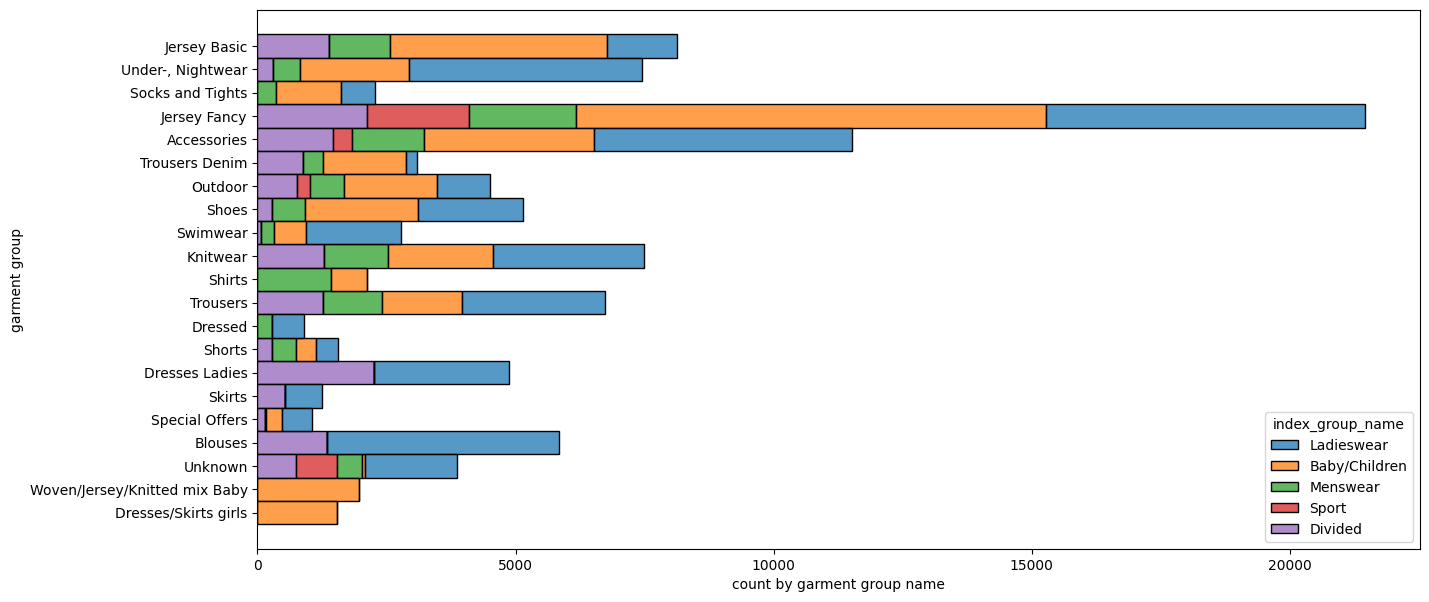

In [5]:
# Plot the count using garment group name
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=article_df, y="garment_group_name", color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel("count by garment group name")
ax.set_ylabel("garment group")
plt.show()

In [6]:
article_df.groupby(['index_group_name', 'index_name']).agg(pl.col('article_id').count())

AttributeError: 'DataFrame' object has no attribute 'groupby'

In [ ]:
customer_df = hm_raw_data.extract_cust_df()
customer_df.head()

customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
str,f64,f64,str,str,i64,str
"""00000dbacae5abe5e23885899a1fa4…",null,null,"""ACTIVE""","""NONE""",49,"""52043ee2162cf5aa7ee79974281641…"
"""0000423b00ade91418cceaf3b26c6a…",null,null,"""ACTIVE""","""NONE""",25,"""2973abc54daa8a5f8ccfe9362140c6…"
"""000058a12d5b43e67d225668fa1f8d…",null,null,"""ACTIVE""","""NONE""",24,"""64f17e6a330a85798e4998f62d0930…"
"""00005ca1c9ed5f5146b52ac8639a40…",null,null,"""ACTIVE""","""NONE""",54,"""5d36574f52495e81f019b680c843c4…"
"""00006413d8573cd20ed7128e53b7b1…",1.0,1.0,"""ACTIVE""","""Regularly""",52,"""25fa5ddee9aac01b35208d01736e57…"


In [ ]:
transactions_df = hm_raw_data.extract_trans_df()
transactions_df.head()

t_dat,customer_id,article_id,price,sales_channel_id
date,str,i64,f64,i64
2018-09-20,"""000058a12d5b43e67d225668fa1f8d…",663713001,0.050831,2
2018-09-20,"""000058a12d5b43e67d225668fa1f8d…",541518023,0.030492,2
2018-09-20,"""00007d2de826758b65a93dd24ce629…",505221004,0.015237,2
2018-09-20,"""00007d2de826758b65a93dd24ce629…",685687003,0.016932,2
2018-09-20,"""00007d2de826758b65a93dd24ce629…",685687004,0.016932,2
